# Modeling exercise

## General Instructions

* Submission date: 25.4.2022
* Submission Method: Link to your solution notebook in [this sheet](https://docs.google.com/spreadsheets/d/1fTmjiVxzw_rM1hdh16enwUTtxzlHSJIiw41dJS2LKp0/edit?usp=sharing).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys; sys.path.append('../Modles and Modeling/src')
import numpy as np
import plotly_express as px

In [3]:
import pandas as pd
import ipywidgets as widgets

In [4]:
from datasets import make_circles_dataframe, make_moons_dataframe

In [5]:
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons

## Fitting and Overfiting 

The goal of the following exercise is to:
* Observe overfitting due to insuffient data
* Observe Overfitting due to overly complex model
* Identify the overfitting point by looking at Train vs Test error dynamic
* Observe how noise levels effect the needed data samples and model capacity

To do so, you'll code an experiment in the first part, and analyze the experiment result in the second part.

### Building an experiment

Code:

1. Create data of size N with noise level of magnitude NL from datasets DS_NAME. 
1. Split it to training and validation data (no need for test set), use 80%-20%. 
1. Use Logistic regression and Choose one complex model of your choice: [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [SVM with RBF kernel](https://scikit-learn.org/stable/modules/svm.html) with different `gamma` values or [Random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) with differnt number of `min_samples_split`. 
1. Train on the train set for different hyper parameter values. compute:
   1. Classification accuracy on the training set (TRE)
   1. Classification accuracy on the validation set (TESTE)
   1. The difference beteen the two above (E_DIFF)
1. Save DS_NAME, N, NL, CLF_NAME, K, TRE, TESTE, E_DIFF and the regularization/hyper param (K, gamma or min_samples_split and regularization value for the linear regression classifier)

Repeat for:
* DS_NAME in Moons, Circles
* N (number of samples) in [5, 10, 50, 100, 1000, 10000]
* NL (noise level) in [0, 0.1, 0.2, 0.3, 0.4, 0.5]
* For the complex model: 10 Values of hyper parameter of the complex model you've chosen.
* For the linear model: 5 values of ridge (l2) regularization - [0.001, 0.01, 0.1, 1, 10, 100, 1000]

### Analysing the expermient results

1. For SVM only, For dataset of size 10k and for each dataset, What are the best model params? How stable is it? 
1. For SVM only, For dataset of size 10k and for each dataset, What is the most stable model and model params? How good is it in comparison to other models? Explain using bias and variance terminoligy.
1. Does regularization help for linear models? consider different datasets sizes. 
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing data sizes? (answer for svm and LR seperatly)
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing model complexity? (answer for svm and LR seperatly)
1. Are the noise level effect the number of datapoints needed to reach optimal test results? 

Bonus:

* For SVM: Select one dataset and with 0.2 noise level. Identify the optimal model params, and visualize the decision boundry learned. 
  * Hint: Use a grid. See classification models notebook 

## Tips and Hints

For buliding the experiment:

* Start with one dataframe holding all the data for both datastes with different noise level. Use the `make_<dataset_name>_dataframe()` functions below, and add two columns, dataset_name and noise_level, before appending the new dataset to the rest of the datasets. Use `df = pd.DataFrame()` to start with an empty dataframe and using a loop, add data to it using `df = df.append(<the needed df here>)`. Verify that you have 10k samples for each dataset type and noise level by a proper `.value_counts()`. You can modify the 
* When you'll need an N samples data with a specific noise level, use `query()` and `head(n)` to get the needed dataset. 
* Use sklearn `train_test_split()` method to split the data with `test_size` and `random_state` parameters set correctly to ensure you are always splitting the data the same why for a given fold `k`. Read [the docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) if needed. 
* You can also not create your own data splitter, and instead use `model_selection.cross_validate()` from sklearn. You'll need to ask for the train erros as well as the test errors, see [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).
* Use prints in proper location to ensure the progress of the experiment. 

**If you get stuck, and need refernce, scroll to the end of the notebook to see more hints!**

## Moons dataset

In [6]:
from sklearn.datasets import make_moons

In [7]:
moons_df = make_moons_dataframe(n_samples=1000, noise_level=0.1)
moons_df.head()

x         y label
0  0.633205  0.495996     A
1  1.010391  0.124382     A
2  0.018775  0.889712     A
3  0.069066  0.262705     B
4  1.726526 -0.169146     B

In [8]:
@widgets.interact
def plot_noisy_moons(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    moons_df = make_moons_dataframe(n_samples=1000, noise_level=noise_level)
    return px.scatter(moons_df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

## Circles Dataset

In [9]:
circles_df = make_circles_dataframe(n_samples=500, noise_level=0)
circles_df.head()

x         y label
0  0.800000  0.000000     B
1 -0.569229 -0.562120     B
2  0.757679 -0.256755     B
3  0.266256 -0.754392     B
4  0.070281 -0.796907     B

In [10]:
@widgets.interact
def plot_noisy_circles(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    df = make_circles_dataframe(1000, noise_level)
    return px.scatter(df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

### Answers : Building an experiment

#### 1.Create data of size N with noise level of magnitude NL from datasets DS_NAME.

In [12]:
n_samples = [5, 10, 50, 100, 1000, 10000]
noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
DS_NAMES = ['moons', 'circles']


In [13]:
def DF_by_name(ds_name,noise_level):
    if ds_name == 'moons' :
        return make_moons_dataframe(n_samples = 10000, noise_level = noise_level)
    else :
        return make_circles_dataframe(n_samples = 10000, noise_level = noise_level)

In [14]:
df_moon_circle = pd.DataFrame()  

for DS_NAME in DS_NAMES:
    for noise_level in noise_levels:
        tmp = DF_by_name(DS_NAME,noise_level)
        tmp['noise_level'] = noise_level
        tmp['ds_name'] = DS_NAME
        df_moon_circle = pd.concat([df_moon_circle, tmp])

df_moon_circle

x         y label  noise_level  ds_name
0    -0.999381  0.035186     A          0.0    moons
1     0.009804  0.360315     B          0.0    moons
2     1.966828  0.244572     B          0.0    moons
3     0.853566  0.520984     A          0.0    moons
4     0.128323  0.009920     B          0.0    moons
...        ...       ...   ...          ...      ...
9995  0.932229 -1.856740     A          0.5  circles
9996  0.949882  0.199008     A          0.5  circles
9997  0.098997  0.650320     A          0.5  circles
9998  1.025690  0.905383     A          0.5  circles
9999  0.982437 -0.797227     A          0.5  circles

[120000 rows x 5 columns]

In [16]:
df_moon_circle.groupby(['ds_name','noise_level']).size()

ds_name  noise_level
circles  0.0            10000
         0.1            10000
         0.2            10000
         0.3            10000
         0.4            10000
         0.5            10000
moons    0.0            10000
         0.1            10000
         0.2            10000
         0.3            10000
         0.4            10000
         0.5            10000
dtype: int64

#### 2.Modeling

In [30]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

datasets_type = ['circles', 'moons']
k_folds = 10
n_samples = [10, 50, 100, 1000, 10000]
noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
clf_types = ['log_reg', 'svm']
hp_range = [0.001 ,0.005, 0.01 ,0.1, 0.5, 1 ,5 , 10, 100, 1000] #<'Your hyper parameters ranges here'>
regularization_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000] #<'Your regularization values here'>
results = []
for ds_type in datasets_type:
    print(f'Working on {ds_type}')
    for nl in noise_levels:
        for n in n_samples:
            ds = df_moon_circle.query('ds_name == @ds_type and noise_level == @nl').head(n)
            print(f'Starting {k_folds}-fold cross validation for {ds_type} datasets with {n} samples and noise level {nl}. Going to train {clf_types} classifiers.')
            for k in range(k_folds):
                print(f'k value is {k}')
                X, Y = ds[['x','y']], ds['label'] #<'Your code here'>
                x_train,x_test,y_train,y_test= train_test_split(X,Y,train_size = 0.8, test_size=0.2,random_state=k) #<'Your code here'>
                for clf_type in clf_types:
                    if clf_type == 'log_reg':
                        for regularization_value in regularization_values:
                            #print(f'For {clf_type}, reg value : {regularization_value}')
                            log_reg = LogisticRegression(penalty='l2', C=regularization_value)
                            log_reg.fit(x_train, y_train)
                            y_train_pred = log_reg.predict(x_train)
                            y_test_pred = log_reg.predict(x_test)
                            train_acc, test_acc = accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)
                            TRE, TESTE, E_DIFF = train_acc, test_acc, train_acc - test_acc
                            results.append((ds_type, n, nl, clf_type, k, TRE, TESTE, E_DIFF,regularization_value))
                    if clf_type == 'svm':
                        for gamma in hp_range:
                            #print(f'For {clf_type}, gamma value : {gamma}')
                            clf = SVC(gamma=gamma)
                            clf.fit(x_train, y_train)
                            y_train_pred = clf.predict(x_train)
                            y_test_pred = clf.predict(x_test)
                            train_acc, test_acc = accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)
                            TRE, TESTE, E_DIFF = train_acc, test_acc, train_acc - test_acc
                            results.append((ds_type, n, nl, clf_type, k, TRE, TESTE, E_DIFF,gamma))

Working on circles
Starting 10-fold cross validation for circles datasets with 10 samples and noise level 0. Going to train ['log_reg', 'svm'] classifiers.
k value is 0
k value is 1
k value is 2
k value is 3
k value is 4
k value is 5
k value is 6
k value is 7
k value is 8
k value is 9
Starting 10-fold cross validation for circles datasets with 50 samples and noise level 0. Going to train ['log_reg', 'svm'] classifiers.
k value is 0
k value is 1
k value is 2
k value is 3
k value is 4
k value is 5
k value is 6
k value is 7
k value is 8
k value is 9
Starting 10-fold cross validation for circles datasets with 100 samples and noise level 0. Going to train ['log_reg', 'svm'] classifiers.
k value is 0
k value is 1
k value is 2
k value is 3
k value is 4
k value is 5
k value is 6
k value is 7
k value is 8
k value is 9
Starting 10-fold cross validation for circles datasets with 1000 samples and noise level 0. Going to train ['log_reg', 'svm'] classifiers.
k value is 0
k value is 1
k value is 2
k

In [31]:
results_df = pd.DataFrame(results, columns = ['DS_NAME', 'N', 'NL', 'CLF_NAME', 'K', 'TRE', 'TESTE','E_DIFF','REG/HP'])
results_df

DS_NAME      N   NL CLF_NAME  K       TRE   TESTE    E_DIFF    REG/HP
0      circles     10  0.0  log_reg  0  0.750000  0.0000  0.750000     0.001
1      circles     10  0.0  log_reg  0  0.750000  0.0000  0.750000     0.010
2      circles     10  0.0  log_reg  0  0.750000  0.0000  0.750000     0.100
3      circles     10  0.0  log_reg  0  0.750000  0.0000  0.750000     1.000
4      circles     10  0.0  log_reg  0  0.875000  0.0000  0.875000    10.000
...        ...    ...  ...      ... ..       ...     ...       ...       ...
10195    moons  10000  0.5      svm  9  0.823750  0.8160  0.007750     1.000
10196    moons  10000  0.5      svm  9  0.823500  0.8145  0.009000     5.000
10197    moons  10000  0.5      svm  9  0.825000  0.8155  0.009500    10.000
10198    moons  10000  0.5      svm  9  0.833750  0.8100  0.023750   100.000
10199    moons  10000  0.5      svm  9  0.904125  0.7740  0.130125  1000.000

[10200 rows x 9 columns]

In [35]:
results_df.to_csv('Results_DF - Building Experiment.csv', index = False)
results_df = pd.read_csv('Results_DF - Building Experiment.csv')
results_df

DS_NAME      N   NL CLF_NAME  K       TRE   TESTE    E_DIFF    REG/HP
0      circles     10  0.0  log_reg  0  0.750000  0.0000  0.750000     0.001
1      circles     10  0.0  log_reg  0  0.750000  0.0000  0.750000     0.010
2      circles     10  0.0  log_reg  0  0.750000  0.0000  0.750000     0.100
3      circles     10  0.0  log_reg  0  0.750000  0.0000  0.750000     1.000
4      circles     10  0.0  log_reg  0  0.875000  0.0000  0.875000    10.000
...        ...    ...  ...      ... ..       ...     ...       ...       ...
10195    moons  10000  0.5      svm  9  0.823750  0.8160  0.007750     1.000
10196    moons  10000  0.5      svm  9  0.823500  0.8145  0.009000     5.000
10197    moons  10000  0.5      svm  9  0.825000  0.8155  0.009500    10.000
10198    moons  10000  0.5      svm  9  0.833750  0.8100  0.023750   100.000
10199    moons  10000  0.5      svm  9  0.904125  0.7740  0.130125  1000.000

[10200 rows x 9 columns]

In [47]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DS_NAME   10200 non-null  object 
 1   N         10200 non-null  int64  
 2   NL        10200 non-null  float64
 3   CLF_NAME  10200 non-null  object 
 4   K         10200 non-null  int64  
 5   TRE       10200 non-null  float64
 6   TESTE     10200 non-null  float64
 7   E_DIFF    10200 non-null  float64
 8   REG/HP    10200 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 717.3+ KB


### Answers : Analysing the expermient results

#### 1.For SVM only, For dataset of size 10k and for each dataset, What are the best model params? How stable is it?

In [48]:
q1_circles = results_df[(results_df['DS_NAME'] == "circles") & (results_df['CLF_NAME'] == "svm") & (results_df['N'] == 10000)]
q1_circles

DS_NAME      N   NL CLF_NAME  K       TRE   TESTE    E_DIFF    REG/HP
687   circles  10000  0.0      svm  0  0.503375  0.4865  0.016875     0.001
688   circles  10000  0.0      svm  0  0.503375  0.4865  0.016875     0.005
689   circles  10000  0.0      svm  0  0.503375  0.4865  0.016875     0.010
690   circles  10000  0.0      svm  0  1.000000  1.0000  0.000000     0.100
691   circles  10000  0.0      svm  0  1.000000  1.0000  0.000000     0.500
...       ...    ...  ...      ... ..       ...     ...       ...       ...
5095  circles  10000  0.5      svm  9  0.584750  0.5600  0.024750     1.000
5096  circles  10000  0.5      svm  9  0.588375  0.5555  0.032875     5.000
5097  circles  10000  0.5      svm  9  0.592875  0.5520  0.040875    10.000
5098  circles  10000  0.5      svm  9  0.667750  0.5320  0.135750   100.000
5099  circles  10000  0.5      svm  9  0.845625  0.5080  0.337625  1000.000

[600 rows x 9 columns]

In [54]:
q1_c_groupped = q1_circles.groupby(['NL', 'REG/HP']).TESTE.agg(['mean', 'std']).reset_index()
q1_c_groupped

NL    REG/HP     mean       std
0   0.0     0.001  0.49075  0.007361
1   0.0     0.005  0.49075  0.007361
2   0.0     0.010  0.49810  0.022913
3   0.0     0.100  1.00000  0.000000
4   0.0     0.500  1.00000  0.000000
5   0.0     1.000  1.00000  0.000000
6   0.0     5.000  1.00000  0.000000
7   0.0    10.000  1.00000  0.000000
8   0.0   100.000  1.00000  0.000000
9   0.0  1000.000  1.00000  0.000000
10  0.1     0.001  0.49225  0.003111
11  0.1     0.005  0.49225  0.003111
12  0.1     0.010  0.49325  0.005293
13  0.1     0.100  0.83605  0.007418
14  0.1     0.500  0.83615  0.008216
15  0.1     1.000  0.83610  0.008286
16  0.1     5.000  0.83490  0.008720
17  0.1    10.000  0.83535  0.008557
18  0.1   100.000  0.83295  0.008846
19  0.1  1000.000  0.81685  0.011183
20  0.2     0.001  0.49225  0.005604
21  0.2     0.005  0.49225  0.005604
22  0.2     0.010  0.49960  0.020284
23  0.2     0.100  0.68840  0.007471
24  0.2     0.500  0.69055  0.006585
25  0.2     1.000  0.68965  0.006408
26  0.2     5.000  0.68985  0.007428
27  0.2    10.000  0.68925  0.006730
28  0.2   100.000  0.68225  0.006512
29  0.2  1000.000  0.64460  0.005343
30  0.3     0.001  0.49535  0.005077
31  0.3     0.005  0.49765  0.011972
32  0.3     0.010  0.52470  0.020360
33  0.3     0.100  0.62860  0.008168
34  0.3     0.500  0.63105  0.006780
35  0.3     1.000  0.62900  0.010033
36  0.3     5.000  0.62980  0.007142
37  0.3    10.000  0.62890  0.008828
38  0.3   100.000  0.61695  0.009245
39  0.3  1000.000  0.57700  0.013810
40  0.4     0.001  0.48855  0.008748
41  0.4     0.005  0.49145  0.014444
42  0.4     0.010  0.52880  0.037872
43  0.4     0.100  0.58050  0.009829
44  0.4     0.500  0.58605  0.008341
45  0.4     1.000  0.58275  0.007425
46  0.4     5.000  0.57835  0.007674
47  0.4    10.000  0.57445  0.009406
48  0.4   100.000  0.57025  0.013145
49  0.4  1000.000  0.54325  0.010117
50  0.5     0.001  0.49390  0.004162
51  0.5     0.005  0.49630  0.009563
52  0.5     0.010  0.53410  0.023129
53  0.5     0.100  0.57160  0.010834
54  0.5     0.500  0.57430  0.010755
55  0.5     1.000  0.57375  0.010210
56  0.5     5.000  0.57145  0.011034
57  0.5    10.000  0.56805  0.011248
58  0.5   100.000  0.54300  0.008206
59  0.5  1000.000  0.52325  0.012557

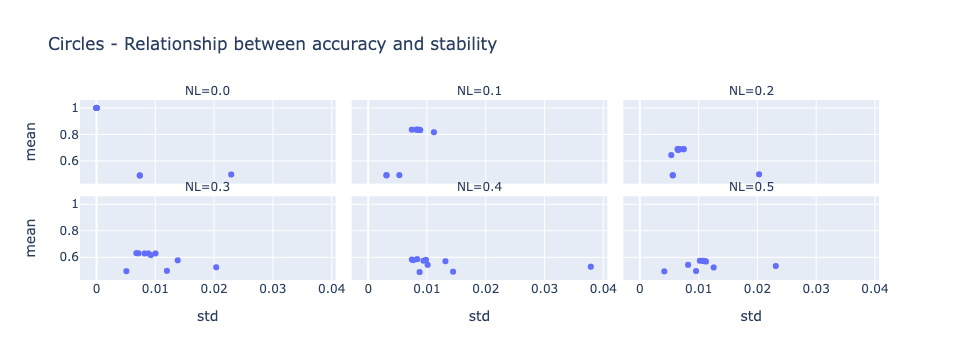

In [65]:
px.scatter(q1_c_groupped, x = 'std', y = 'mean',
           facet_col = 'NL', facet_col_wrap = 3,
          title="Circles - Relationship between accuracy and stability" )


For circles, the best model parameter (gamma) for different Noise Levels are 
1. NL = 0 : Any gamma from 0.1 or higher gives the max accuracy of 1.
1. NL = 0.1 : the best gamma is 0.5. It reaches an accuracy of 0.83615. 
1. NL = 0.2 : the best gamma is 0.5. It reaches an accuracy of 0.69055. 
1. NL = 0.3 : the best gamma is 0.5. It reaches an accuracy of 0.63105.
1. NL = 0.4 : the best gamma is 0.5. It reaches an accuracy of 0.58605.
1. NL = 0.5 : the best gamma is 0.5. It reaches an accuracy of 0.57430.



In [51]:
q1_moons = results_df[(results_df['DS_NAME'] == "moons") & (results_df['CLF_NAME'] == "svm") & (results_df['N'] == 10000)]
q1_moons

DS_NAME      N   NL CLF_NAME  K       TRE   TESTE    E_DIFF    REG/HP
5787    moons  10000  0.0      svm  0  0.859125  0.8520  0.007125     0.001
5788    moons  10000  0.0      svm  0  0.875625  0.8705  0.005125     0.005
5789    moons  10000  0.0      svm  0  0.879750  0.8755  0.004250     0.010
5790    moons  10000  0.0      svm  0  1.000000  1.0000  0.000000     0.100
5791    moons  10000  0.0      svm  0  1.000000  1.0000  0.000000     0.500
...       ...    ...  ...      ... ..       ...     ...       ...       ...
10195   moons  10000  0.5      svm  9  0.823750  0.8160  0.007750     1.000
10196   moons  10000  0.5      svm  9  0.823500  0.8145  0.009000     5.000
10197   moons  10000  0.5      svm  9  0.825000  0.8155  0.009500    10.000
10198   moons  10000  0.5      svm  9  0.833750  0.8100  0.023750   100.000
10199   moons  10000  0.5      svm  9  0.904125  0.7740  0.130125  1000.000

[600 rows x 9 columns]

In [63]:
q1_m_groupped = q1_moons.groupby(['NL', 'REG/HP']).TESTE.agg(['mean', 'std']).reset_index()
q1_m_groupped

NL    REG/HP     mean       std
0   0.0     0.001  0.85425  0.009517
1   0.0     0.005  0.87250  0.009606
2   0.0     0.010  0.87720  0.008964
3   0.0     0.100  0.99985  0.000474
4   0.0     0.500  1.00000  0.000000
5   0.0     1.000  1.00000  0.000000
6   0.0     5.000  1.00000  0.000000
7   0.0    10.000  1.00000  0.000000
8   0.0   100.000  1.00000  0.000000
9   0.0  1000.000  1.00000  0.000000
10  0.1     0.001  0.85705  0.006559
11  0.1     0.005  0.87445  0.006568
12  0.1     0.010  0.87805  0.006189
13  0.1     0.100  0.96650  0.003064
14  0.1     0.500  0.99885  0.000669
15  0.1     1.000  0.99925  0.000589
16  0.1     5.000  0.99935  0.000474
17  0.1    10.000  0.99930  0.000675
18  0.1   100.000  0.99930  0.000632
19  0.1  1000.000  0.99800  0.001054
20  0.2     0.001  0.85200  0.006860
21  0.2     0.005  0.86430  0.006061
22  0.2     0.010  0.86595  0.005890
23  0.2     0.100  0.92705  0.004723
24  0.2     0.500  0.97160  0.003438
25  0.2     1.000  0.97245  0.002713
26  0.2     5.000  0.97165  0.003258
27  0.2    10.000  0.97135  0.003028
28  0.2   100.000  0.97060  0.003026
29  0.2  1000.000  0.96445  0.003050
30  0.3     0.001  0.84125  0.005712
31  0.3     0.005  0.85200  0.005223
32  0.3     0.010  0.85280  0.005001
33  0.3     0.100  0.88325  0.004480
34  0.3     0.500  0.90975  0.005663
35  0.3     1.000  0.91035  0.006355
36  0.3     5.000  0.90995  0.005824
37  0.3    10.000  0.90980  0.006010
38  0.3   100.000  0.90930  0.006268
39  0.3  1000.000  0.89315  0.007828
40  0.4     0.001  0.82875  0.008173
41  0.4     0.005  0.83580  0.008196
42  0.4     0.010  0.83580  0.008149
43  0.4     0.100  0.85925  0.006378
44  0.4     0.500  0.86820  0.004510
45  0.4     1.000  0.86905  0.004628
46  0.4     5.000  0.87040  0.004446
47  0.4    10.000  0.87095  0.005199
48  0.4   100.000  0.86735  0.005608
49  0.4  1000.000  0.83975  0.007247
50  0.5     0.001  0.80510  0.008739
51  0.5     0.005  0.80685  0.008785
52  0.5     0.010  0.80780  0.008364
53  0.5     0.100  0.81705  0.007433
54  0.5     0.500  0.81830  0.008094
55  0.5     1.000  0.81775  0.007365
56  0.5     5.000  0.81810  0.007464
57  0.5    10.000  0.81765  0.007315
58  0.5   100.000  0.80845  0.008780
59  0.5  1000.000  0.77095  0.009932

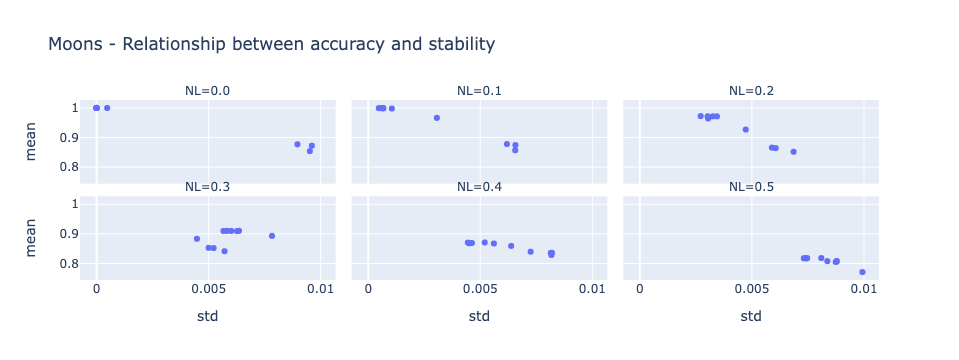

In [103]:
px.scatter(q1_m_groupped, x = 'std', y = 'mean',
           facet_col = 'NL', facet_col_wrap = 3,
          title="Moons - Relationship between accuracy and stability" )


For moons, the best model parameter (gamma) for different Noise Levels are 
1. NL = 0 : Any gamma from 0.5 or higher gives the max accuracy of 1.
1. NL = 0.1 : the best gamma is 5. It reaches an accuracy of 0.99935. 
1. NL = 0.2 : the best gamma is 1. It reaches an accuracy of 0.97245. 
1. NL = 0.3 : the best gamma is 1. It reaches an accuracy of 0.91035.
1. NL = 0.4 : the best gamma is 10. It reaches an accuracy of 0.87095.
1. NL = 0.5 : the best gamma is 0.5. It reaches an accuracy of 0.81830.



#### 2. For SVM only, For dataset of size 10k and for each dataset, What is the most stable model and model params? How good is it in comparison to other models? Explain using bias and variance terminoligy.

For circles, the most stable model parameter (gamma) for different Noise Levels are: 
1. NL = 0 : Any gamma from 0.1 or higher gives the min std deviation of 0.
1. NL = 0.1 : the best gamma are 0.001 or 0.005. It reaches a std dev of 0.003111. 
1. NL = 0.2 : the best gamma is 1000. It reaches a std dev of 0.005343. 
1. NL = 0.3 : the best gamma is 0.001. It reaches a std dev of 0.005077.
1. NL = 0.4 : the best gamma is 1. It reaches a std dev of 0.007425.
1. NL = 0.5 : the best gamma is 0.001. It reaches a std dev of 0.004162.



For moons, the most stable model parameter (gamma) for different Noise Levels are: 
1. NL = 0 : Any gamma from 0.5 or higher gives the min std deviation of 0.
1. NL = 0.1 : the best gamma are 5. It reaches a std dev of 0.000474. 
1. NL = 0.2 : the best gamma is 1. It reaches a std dev of 0.002713. 
1. NL = 0.3 : the best gamma is 0.1. It reaches a std dev of 0.004480.
1. NL = 0.4 : the best gamma is 5. It reaches a std dev of 0.004446.
1. NL = 0.5 : the best gamma is 10. It reaches a std dev of 0.007315.



For circles I don't see a clear relationship between accuracy and std deviation. We should consider a trade-off between the two, in order to minimize the bias (high accuracy) and the variance (std dev).
For moons, however, the relationship seems clearer. As we see on the graphs above, for most Noise Levels, the highest accuracy (minimal bias) is achieved with minimal std dev (variance). It makes it easier to choose the right gamma.

#### 3.Does regularization help for linear models? consider different datasets sizes

In [114]:
n_samples

[10, 50, 100, 1000, 10000]

In [132]:
q3_circles_10 = results_df[(results_df['N'] == 10) &(results_df['DS_NAME'] == "circles") & (results_df['CLF_NAME'] == "log_reg")]
q3_circles_50 = results_df[(results_df['N'] == 50) &(results_df['DS_NAME'] == "circles") & (results_df['CLF_NAME'] == "log_reg")]
q3_circles_100 = results_df[(results_df['N'] == 100) &(results_df['DS_NAME'] == "circles") & (results_df['CLF_NAME'] == "log_reg")]
q3_circles_1000 = results_df[(results_df['N'] == 1000) &(results_df['DS_NAME'] == "circles") & (results_df['CLF_NAME'] == "log_reg")]
q3_circles_10000 = results_df[(results_df['N'] == 10000) &(results_df['DS_NAME'] == "circles") & (results_df['CLF_NAME'] == "log_reg")]

In [133]:
q3_c_10_g = q3_circles_10.groupby(['NL','REG/HP']).TESTE.agg(['mean', 'std']).reset_index()
q3_c_50_g = q3_circles_50.groupby(['NL','REG/HP']).TESTE.agg(['mean', 'std']).reset_index()
q3_c_100_g = q3_circles_100.groupby(['NL','REG/HP']).TESTE.agg(['mean', 'std']).reset_index()
q3_c_1000_g = q3_circles_1000.groupby(['NL','REG/HP']).TESTE.agg(['mean', 'std']).reset_index()
q3_c_10000_g = q3_circles_10000.groupby(['NL','REG/HP']).TESTE.agg(['mean', 'std']).reset_index()

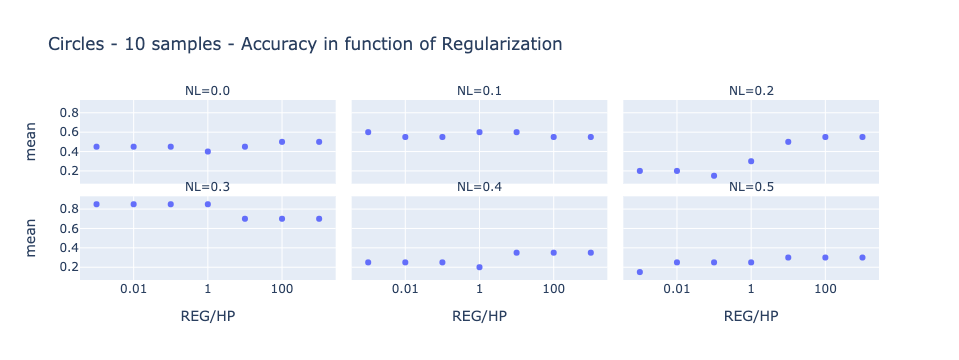

In [134]:
px.scatter(q3_c_10_g, x = 'REG/HP', y = 'mean',
           facet_col = 'NL', facet_col_wrap = 3, 
           log_x=True,
           title="Circles - 10 samples - Accuracy in function of Regularization")

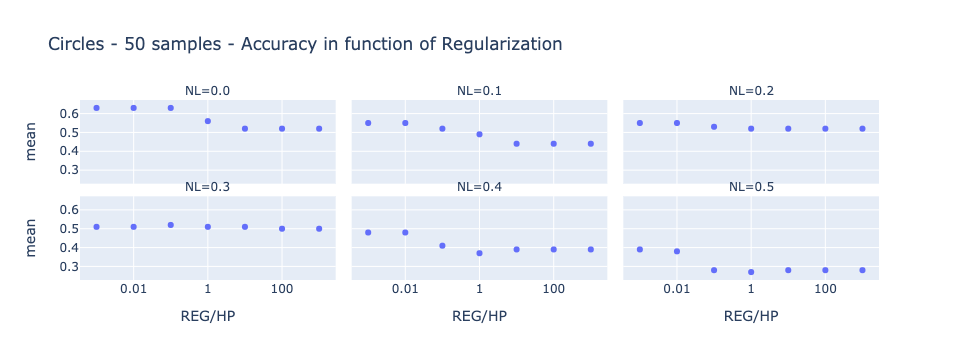

In [135]:
px.scatter(q3_c_50_g, x = 'REG/HP', y = 'mean',
           facet_col = 'NL', facet_col_wrap = 3, 
           log_x=True,
           title="Circles - 50 samples - Accuracy in function of Regularization")

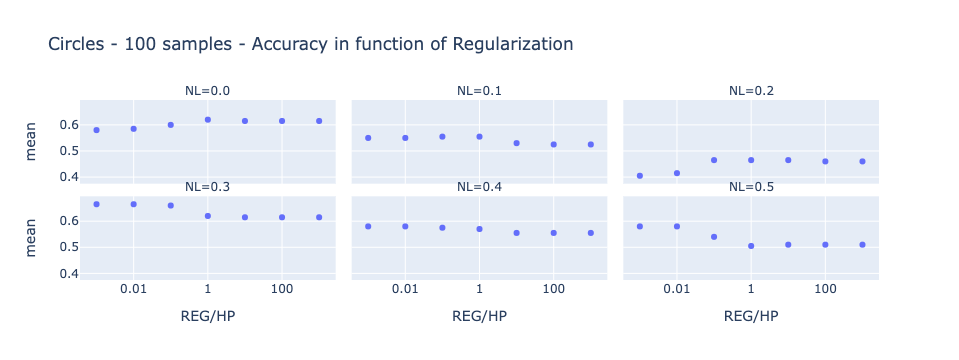

In [136]:
px.scatter(q3_c_100_g, x = 'REG/HP', y = 'mean',
           facet_col = 'NL', facet_col_wrap = 3, 
           log_x=True,
           title="Circles - 100 samples - Accuracy in function of Regularization")

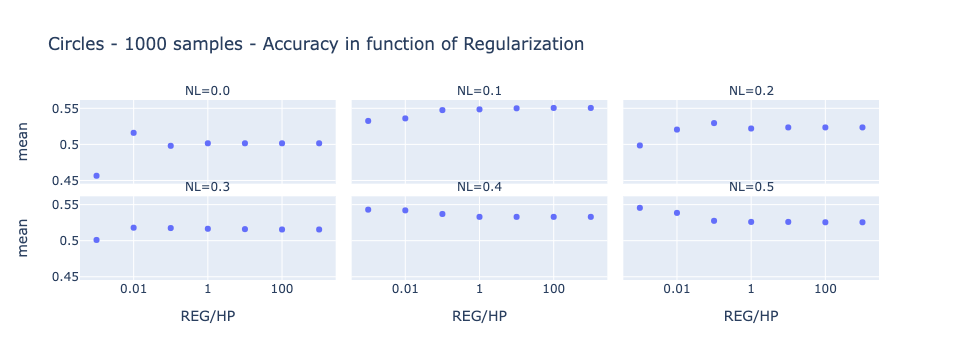

In [137]:
px.scatter(q3_c_1000_g, x = 'REG/HP', y = 'mean',
           facet_col = 'NL', facet_col_wrap = 3, 
           log_x=True,
           title="Circles - 1000 samples - Accuracy in function of Regularization")

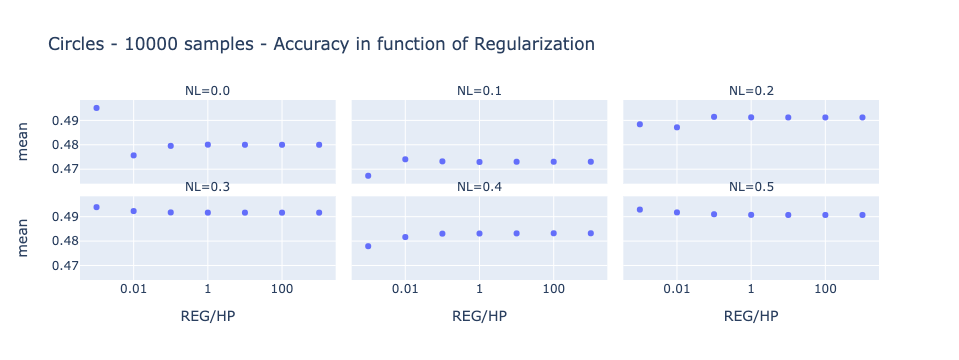

In [149]:
px.scatter(q3_c_10000_g, x = 'REG/HP', y = 'mean', 
           facet_col = 'NL', facet_col_wrap = 3, 
           log_x=True,
           title="Circles - 10000 samples - Accuracy in function of Regularization")

Circles:
For smaller sizes of datasets, the accuracy curve takes a "sinusoidal" shape, with no specific direction (decrease or increase) and bigger amplitude.
For higher sizes of datasets, the sinusoid seems to be flattened with smaller amplitudes, indicating that it doesn't affect the accuracy.

In [139]:
q3_moons_10 = results_df[(results_df['N'] == 10) &(results_df['DS_NAME'] == "moons") & (results_df['CLF_NAME'] == "log_reg")]
q3_moons_50 = results_df[(results_df['N'] == 50) &(results_df['DS_NAME'] == "moons") & (results_df['CLF_NAME'] == "log_reg")]
q3_moons_100 = results_df[(results_df['N'] == 100) &(results_df['DS_NAME'] == "moons") & (results_df['CLF_NAME'] == "log_reg")]
q3_moons_1000 = results_df[(results_df['N'] == 1000) &(results_df['DS_NAME'] == "moons") & (results_df['CLF_NAME'] == "log_reg")]
q3_moons_10000 = results_df[(results_df['N'] == 10000) &(results_df['DS_NAME'] == "moons") & (results_df['CLF_NAME'] == "log_reg")]

In [140]:
q3_m_10_g = q3_moons_10.groupby(['NL','REG/HP']).TESTE.agg(['mean', 'std']).reset_index()
q3_m_50_g = q3_moons_50.groupby(['NL','REG/HP']).TESTE.agg(['mean', 'std']).reset_index()
q3_m_100_g = q3_moons_100.groupby(['NL','REG/HP']).TESTE.agg(['mean', 'std']).reset_index()
q3_m_1000_g = q3_moons_1000.groupby(['NL','REG/HP']).TESTE.agg(['mean', 'std']).reset_index()
q3_m_10000_g = q3_moons_10000.groupby(['NL','REG/HP']).TESTE.agg(['mean', 'std']).reset_index()

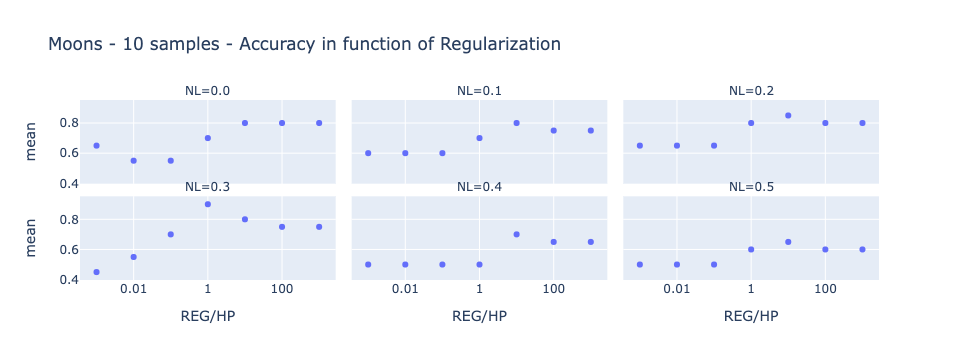

In [141]:
px.scatter(q3_m_10_g, x = 'REG/HP', y = 'mean',
           facet_col = 'NL', facet_col_wrap = 3, 
           log_x=True,
           title="Moons - 10 samples - Accuracy in function of Regularization")

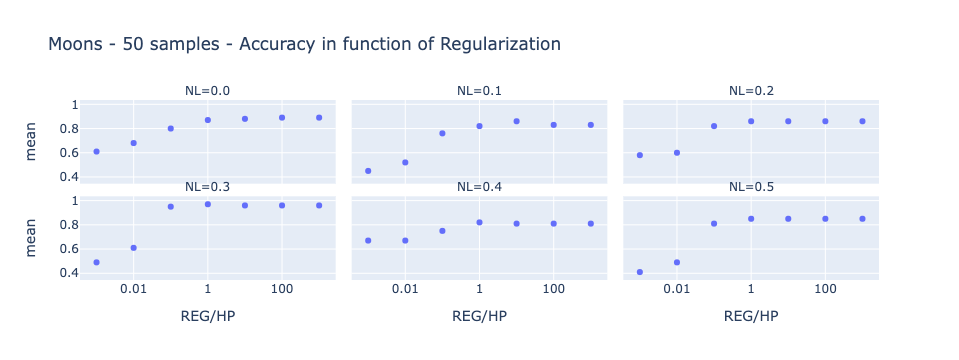

In [143]:
px.scatter(q3_m_50_g, x = 'REG/HP', y = 'mean',
           facet_col = 'NL', facet_col_wrap = 3, 
           log_x=True,
           title="Moons - 50 samples - Accuracy in function of Regularization")

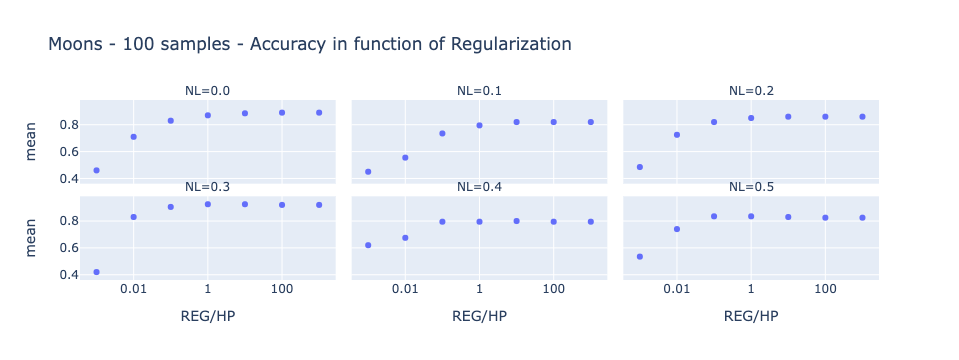

In [145]:
px.scatter(q3_m_100_g, x = 'REG/HP', y = 'mean',
           facet_col = 'NL', facet_col_wrap = 3, 
           log_x=True,
           title="Moons - 100 samples - Accuracy in function of Regularization")

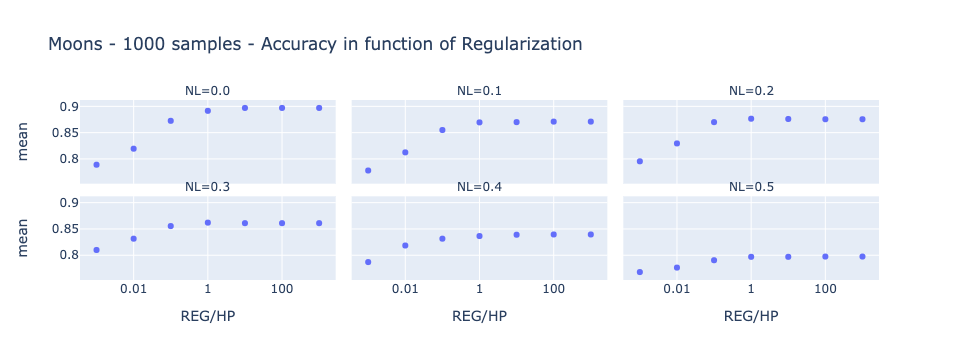

In [146]:
px.scatter(q3_m_1000_g, x = 'REG/HP', y = 'mean',
           facet_col = 'NL', facet_col_wrap = 3, 
           log_x=True,
           title="Moons - 1000 samples - Accuracy in function of Regularization")

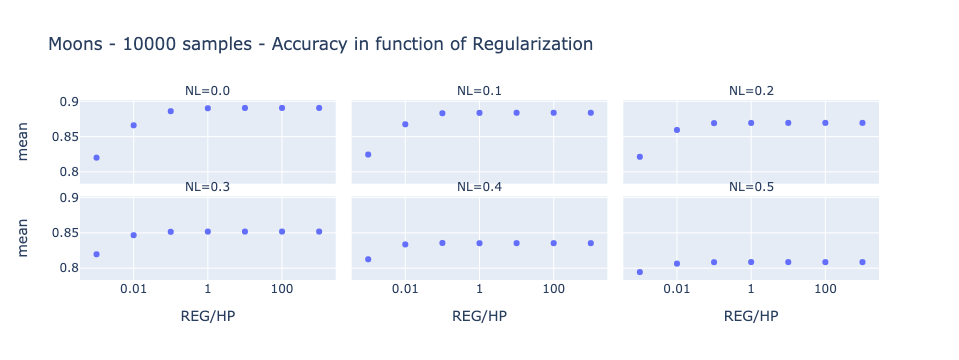

In [147]:
px.scatter(q3_m_10000_g, x = 'REG/HP', y = 'mean',
           facet_col = 'NL', facet_col_wrap = 3, 
           log_x=True,
           title="Moons - 10000 samples - Accuracy in function of Regularization")

Moons:
As dataset size grows, the clearer the relationship between a high regularization and a high accuracy.

#### 4.For a given noise level of your chioce, How does the train, test and difference error changes with increasing data sizes? (answer for svm and LR seperatly)

In [235]:
results_df_03 = results_df[results_df['NL'] == 0.3]
results_df_03_c = results_df_03[results_df_03['DS_NAME'] == 'circles']
results_df_03_c_svm = results_df_03_c[results_df_03_c['CLF_NAME'] == 'svm']
gp_results_df_03_c_svm = results_df_03_c_svm.groupby(['N','REG/HP'])['TRE','TESTE','E_DIFF'].mean().reset_index()


/var/folders/c8/vzbxxgn95_5006y_v3wt76_m0000gn/T/ipykernel_8615/1624868399.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



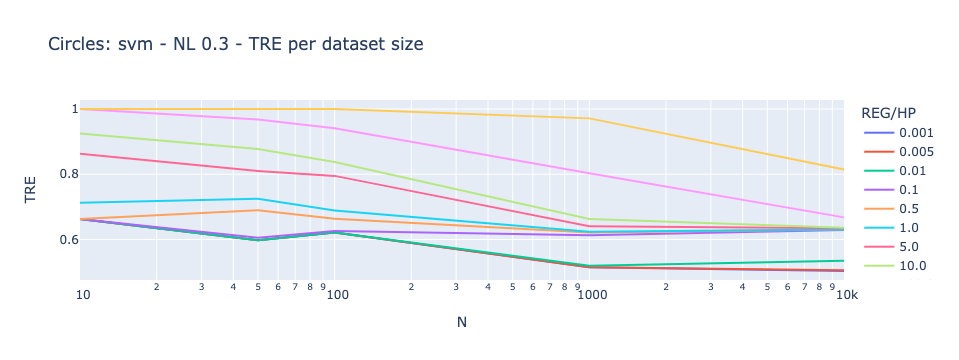

In [236]:
px.line(gp_results_df_03_c_svm, x='N', y='TRE', 
        color = 'REG/HP',
        log_x=True, 
        title="Circles: svm - NL 0.3 - TRE per dataset size ")

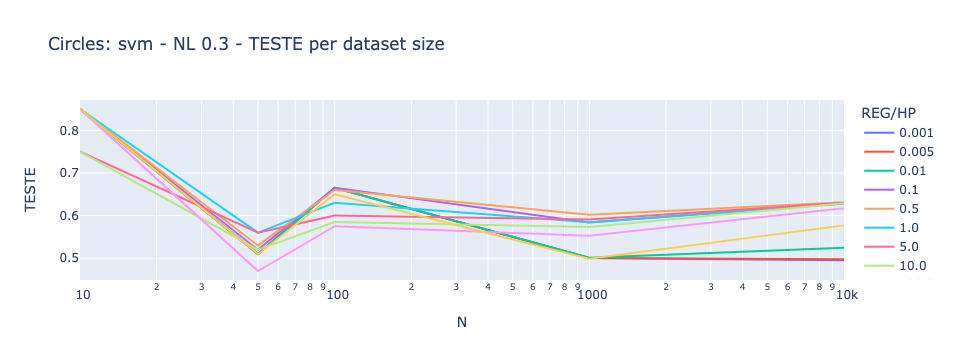

In [230]:
px.line(gp_results_df_03_c_svm, x='N', y='TESTE', 
        color = 'REG/HP',
        log_x=True, 
        title="Circles: svm - NL 0.3 - TESTE per dataset size ")

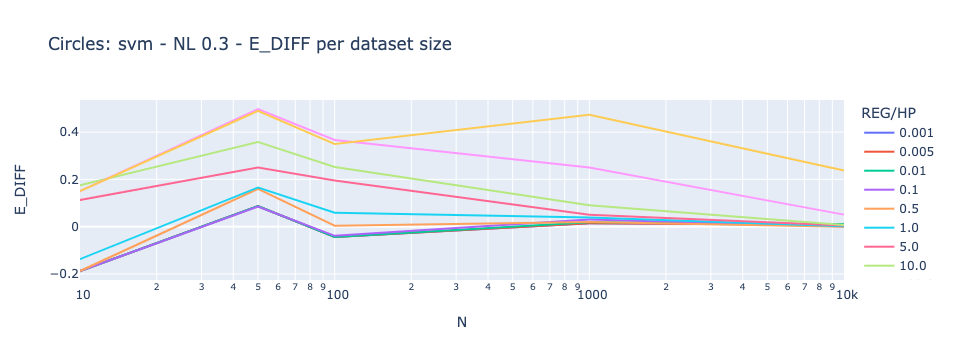

In [234]:
px.line(gp_results_df_03_c_svm, x='N', y='E_DIFF', 
        color = 'REG/HP',
        log_x=True, 
        title="Circles: svm - NL 0.3 - E_DIFF per dataset size ")

In [237]:
results_df_03 = results_df[results_df['NL'] == 0.3]
results_df_03_c = results_df_03[results_df_03['DS_NAME'] == 'circles']
results_df_03_c_lr = results_df_03_c[results_df_03_c['CLF_NAME'] == 'log_reg']
gp_results_df_03_c_lr = results_df_03_c_lr.groupby(['N','REG/HP'])['TRE','TESTE','E_DIFF'].mean().reset_index()

/var/folders/c8/vzbxxgn95_5006y_v3wt76_m0000gn/T/ipykernel_8615/2233046709.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



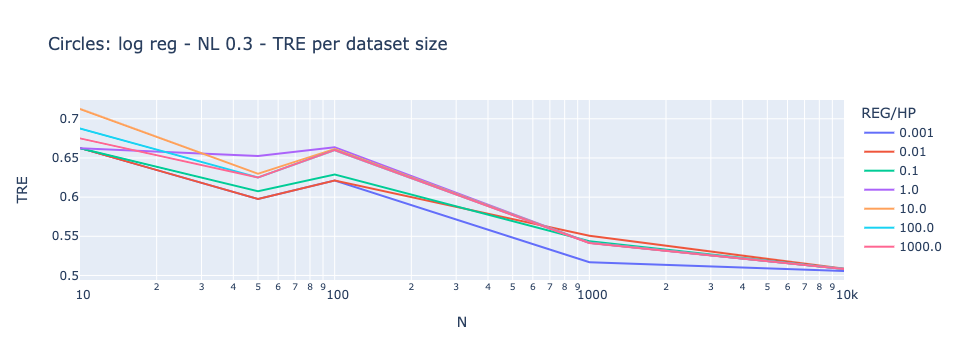

In [238]:
px.line(gp_results_df_03_c_lr, x='N', y='TRE', 
        color = 'REG/HP',
        log_x=True, 
        title="Circles: log reg - NL 0.3 - TRE per dataset size ")

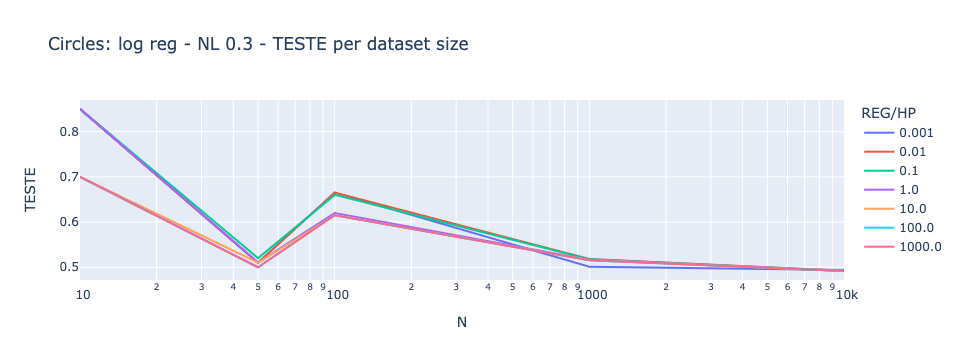

In [239]:
px.line(gp_results_df_03_c_lr, x='N', y='TESTE', 
        color = 'REG/HP',
        log_x=True, 
        title="Circles: log reg - NL 0.3 - TESTE per dataset size ")

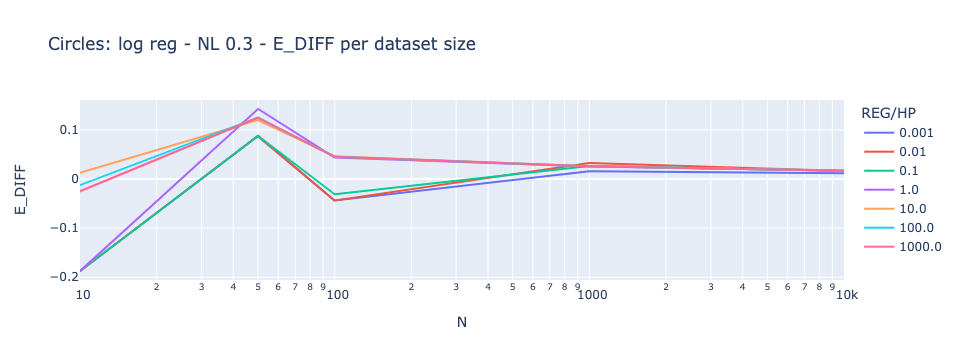

In [240]:
px.line(gp_results_df_03_c_lr, x='N', y='E_DIFF', 
        color = 'REG/HP',
        log_x=True, 
        title="Circles: log reg - NL 0.3 - E_DIFF per dataset size ")

In [241]:
results_df_03 = results_df[results_df['NL'] == 0.3]
results_df_03_m = results_df_03[results_df_03['DS_NAME'] == 'moons']
results_df_03_m_svm = results_df_03_m[results_df_03_m['CLF_NAME'] == 'svm']
gp_results_df_03_m_svm = results_df_03_m_svm.groupby(['N','REG/HP'])['TRE','TESTE','E_DIFF'].mean().reset_index()


/var/folders/c8/vzbxxgn95_5006y_v3wt76_m0000gn/T/ipykernel_8615/1693760166.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



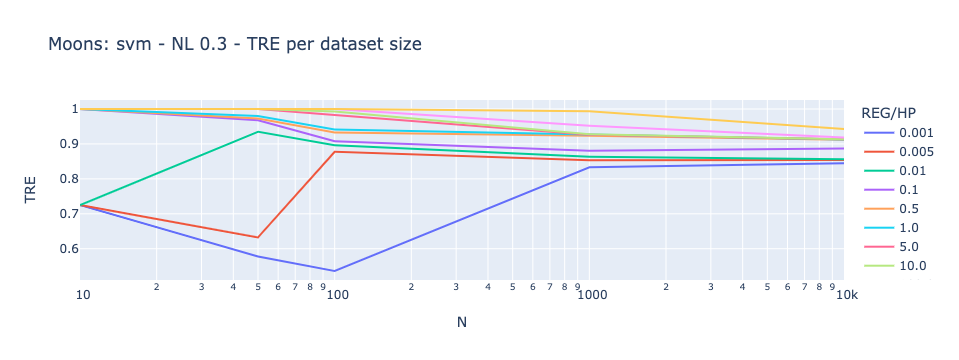

In [242]:
px.line(gp_results_df_03_m_svm, x='N', y='TRE', 
        color = 'REG/HP',
        log_x=True, 
        title="Moons: svm - NL 0.3 - TRE per dataset size ")

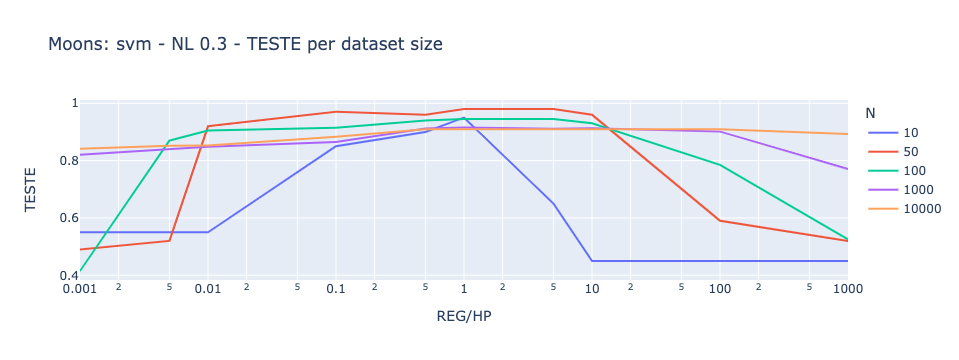

In [186]:
px.line(gp_results_df_03_m_svm, x='N', y='TESTE', 
        color = 'N',
        log_x=True, 
        title="Moons: svm - NL 0.3 - TESTE per dataset size ")

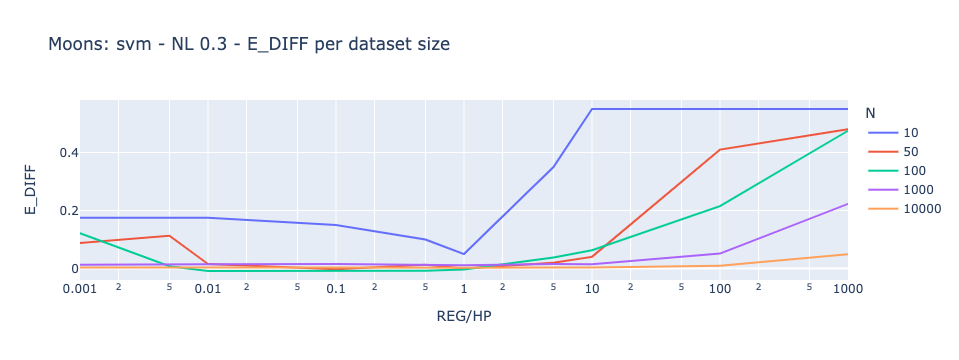

In [187]:
px.line(gp_results_df_03_m_svm, x='REG/HP', y='E_DIFF', 
        color = 'N',
        log_x=True, 
        title="Moons: svm - NL 0.3 - E_DIFF per dataset size ")

In [188]:
results_df_03 = results_df[results_df['NL'] == 0.3]
results_df_03_m = results_df_03[results_df_03['DS_NAME'] == 'moons']
results_df_03_m_lr = results_df_03_m[results_df_03_m['CLF_NAME'] == 'log_reg']
gp_results_df_03_m_lr = results_df_03_m_lr.groupby(['N','REG/HP'])['TRE','TESTE','E_DIFF'].mean().reset_index()
gp_results_df_03_m_lr

/var/folders/c8/vzbxxgn95_5006y_v3wt76_m0000gn/T/ipykernel_8615/3597795726.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



N    REG/HP       TRE    TESTE    E_DIFF
0      10     0.001  0.700000  0.45000  0.250000
1      10     0.010  0.725000  0.55000  0.175000
2      10     0.100  0.762500  0.70000  0.062500
3      10     1.000  1.000000  0.90000  0.100000
4      10    10.000  1.000000  0.80000  0.200000
5      10   100.000  1.000000  0.75000  0.250000
6      10  1000.000  1.000000  0.75000  0.250000
7      50     0.001  0.577500  0.49000  0.087500
8      50     0.010  0.715000  0.61000  0.105000
9      50     0.100  0.975000  0.95000  0.025000
10     50     1.000  0.972500  0.97000  0.002500
11     50    10.000  0.972500  0.96000  0.012500
12     50   100.000  0.982500  0.96000  0.022500
13     50  1000.000  1.000000  0.96000  0.040000
14    100     0.001  0.537500  0.42000  0.117500
15    100     0.010  0.866250  0.83000  0.036250
16    100     0.100  0.902500  0.90500 -0.002500
17    100     1.000  0.911250  0.92500 -0.013750
18    100    10.000  0.927500  0.92500  0.002500
19    100   100.000  0.931250  0.92000  0.011250
20    100  1000.000  0.931250  0.92000  0.011250
21   1000     0.001  0.821500  0.81000  0.011500
22   1000     0.010  0.845125  0.83150  0.013625
23   1000     0.100  0.872000  0.85550  0.016500
24   1000     1.000  0.874625  0.86200  0.012625
25   1000    10.000  0.874125  0.86100  0.013125
26   1000   100.000  0.874000  0.86100  0.013000
27   1000  1000.000  0.874000  0.86100  0.013000
28  10000     0.001  0.822875  0.81965  0.003225
29  10000     0.010  0.850137  0.84675  0.003387
30  10000     0.100  0.855550  0.85155  0.004000
31  10000     1.000  0.855337  0.85185  0.003487
32  10000    10.000  0.855312  0.85190  0.003412
33  10000   100.000  0.855275  0.85190  0.003375
34  10000  1000.000  0.855275  0.85190  0.003375

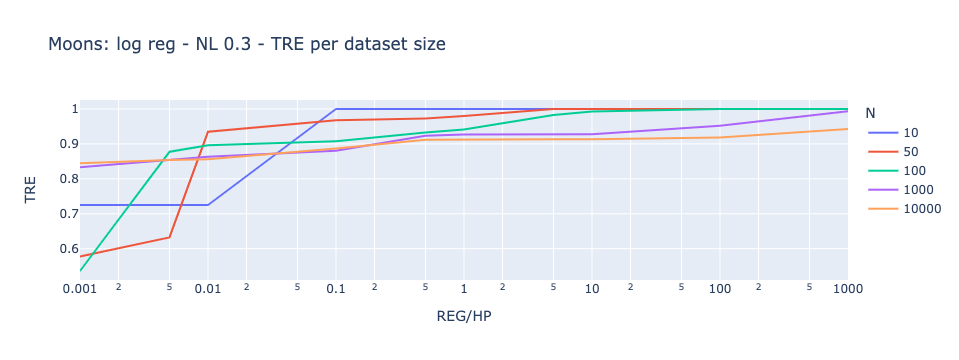

In [189]:
px.line(gp_results_df_03_m_svm, x='REG/HP', y='TRE', 
        color = 'N',
        log_x=True, 
        title="Moons: log reg - NL 0.3 - TRE per dataset size ")

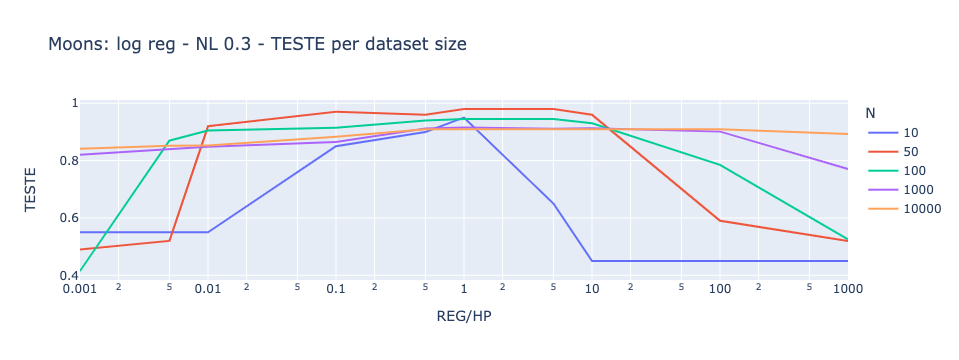

In [190]:
px.line(gp_results_df_03_m_svm, x='REG/HP', y='TESTE', 
        color = 'N',
        log_x=True, 
        title="Moons: log reg - NL 0.3 - TESTE per dataset size ")

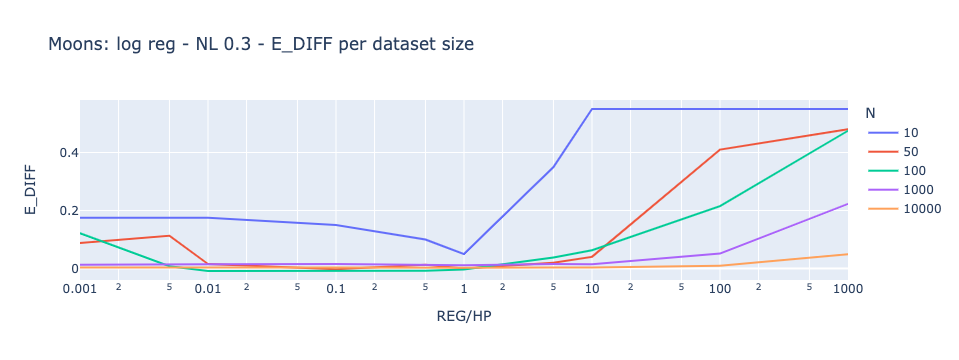

In [191]:
px.line(gp_results_df_03_m_svm, x='REG/HP', y='E_DIFF', 
        color = 'N',
        log_x=True, 
        title="Moons: log reg - NL 0.3 - E_DIFF per dataset size ")

#### 5. For a given noise level of your chioce, How does the train, test and difference error changes with increasing model complexity? (answer for svm and LR seperatly)

In [208]:
results_df_03 = results_df[results_df['NL'] == 0.3]
results_df_03_c = results_df_03[results_df_03['DS_NAME'] == 'circles']
results_df_03_c_svm = results_df_03_c[results_df_03_c['CLF_NAME'] == 'svm']
gp_results_df_03_c_svm = results_df_03_c_svm.groupby(['N', 'REG/HP'])['TRE','TESTE','E_DIFF'].mean().reset_index()
gp_results_df_03_c_svm

/var/folders/c8/vzbxxgn95_5006y_v3wt76_m0000gn/T/ipykernel_8615/1201016704.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



N    REG/HP       TRE    TESTE    E_DIFF
0      10     0.001  0.662500  0.85000 -0.187500
1      10     0.005  0.662500  0.85000 -0.187500
2      10     0.010  0.662500  0.85000 -0.187500
3      10     0.100  0.662500  0.85000 -0.187500
4      10     0.500  0.662500  0.85000 -0.187500
5      10     1.000  0.712500  0.85000 -0.137500
6      10     5.000  0.862500  0.75000  0.112500
7      10    10.000  0.925000  0.75000  0.175000
8      10   100.000  1.000000  0.85000  0.150000
9      10  1000.000  1.000000  0.85000  0.150000
10     50     0.001  0.597500  0.51000  0.087500
11     50     0.005  0.597500  0.51000  0.087500
12     50     0.010  0.597500  0.51000  0.087500
13     50     0.100  0.605000  0.52000  0.085000
14     50     0.500  0.690000  0.53000  0.160000
15     50     1.000  0.725000  0.56000  0.165000
16     50     5.000  0.810000  0.56000  0.250000
17     50    10.000  0.877500  0.52000  0.357500
18     50   100.000  0.967500  0.47000  0.497500
19     50  1000.000  1.000000  0.51000  0.490000
20    100     0.001  0.621250  0.66500 -0.043750
21    100     0.005  0.621250  0.66500 -0.043750
22    100     0.010  0.621250  0.66500 -0.043750
23    100     0.100  0.626250  0.66500 -0.038750
24    100     0.500  0.663750  0.66000  0.003750
25    100     1.000  0.688750  0.63000  0.058750
26    100     5.000  0.795000  0.60000  0.195000
27    100    10.000  0.837500  0.58500  0.252500
28    100   100.000  0.941250  0.57500  0.366250
29    100  1000.000  1.000000  0.65000  0.350000
30   1000     0.001  0.514875  0.50050  0.014375
31   1000     0.005  0.514875  0.50050  0.014375
32   1000     0.010  0.519375  0.50100  0.018375
33   1000     0.100  0.613250  0.58350  0.029750
34   1000     0.500  0.621500  0.60200  0.019500
35   1000     1.000  0.623500  0.58450  0.039000
36   1000     5.000  0.640875  0.59100  0.049875
37   1000    10.000  0.663125  0.57300  0.090125
38   1000   100.000  0.803000  0.55250  0.250500
39   1000  1000.000  0.971250  0.49850  0.472750
40  10000     0.001  0.503463  0.49535  0.008112
41  10000     0.005  0.505800  0.49765  0.008150
42  10000     0.010  0.534763  0.52470  0.010062
43  10000     0.100  0.629012  0.62860  0.000413
44  10000     0.500  0.631000  0.63105 -0.000050
45  10000     1.000  0.630675  0.62900  0.001675
46  10000     5.000  0.634275  0.62980  0.004475
47  10000    10.000  0.636288  0.62890  0.007387
48  10000   100.000  0.667837  0.61695  0.050887
49  10000  1000.000  0.814475  0.57700  0.237475

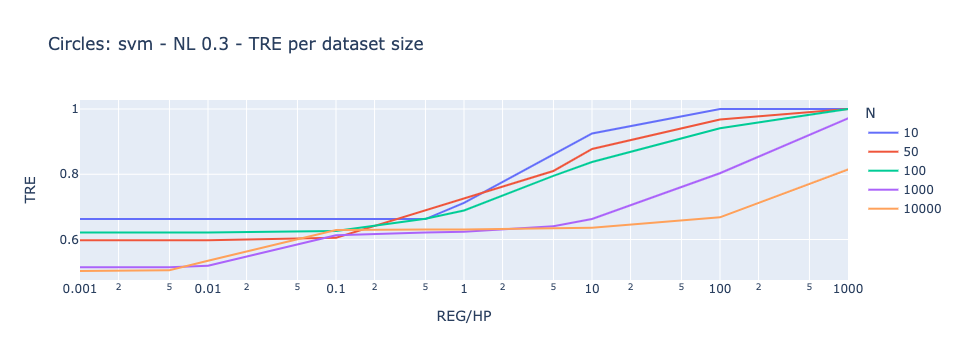

In [215]:
px.line(gp_results_df_03_c_svm, x='REG/HP', y='TRE', 
        color = 'N',
        log_x=True, 
        title="Circles: svm - NL 0.3 - TRE per dataset size ")

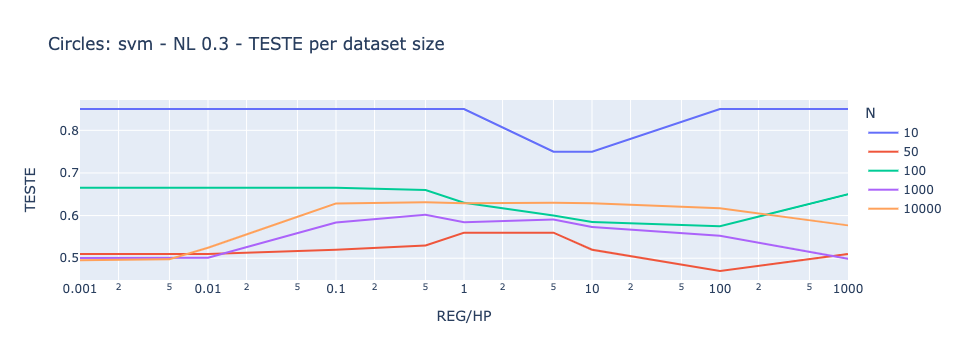

In [214]:
px.line(gp_results_df_03_c_svm, x='REG/HP', y='TESTE', 
        color = 'N',
        log_x=True, 
        title="Circles: svm - NL 0.3 - TESTE per dataset size ")

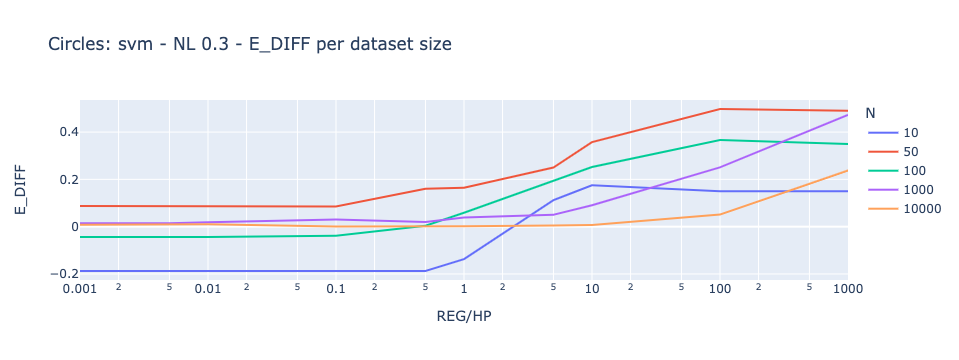

In [213]:
px.line(gp_results_df_03_c_svm, x='REG/HP', y='E_DIFF', 
        color = 'N',
        log_x=True, 
        title="Circles: svm - NL 0.3 - E_DIFF per dataset size ")

In [216]:
results_df_03 = results_df[results_df['NL'] == 0.3]
results_df_03_c = results_df_03[results_df_03['DS_NAME'] == 'circles']
results_df_03_c_lr = results_df_03_c[results_df_03_c['CLF_NAME'] == 'log_reg']
gp_results_df_03_c_lr = results_df_03_c_lr.groupby(['N', 'REG/HP'])['TRE','TESTE','E_DIFF'].mean().reset_index()
gp_results_df_03_c_lr

/var/folders/c8/vzbxxgn95_5006y_v3wt76_m0000gn/T/ipykernel_8615/2050245657.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



N    REG/HP       TRE    TESTE    E_DIFF
0      10     0.001  0.662500  0.85000 -0.187500
1      10     0.010  0.662500  0.85000 -0.187500
2      10     0.100  0.662500  0.85000 -0.187500
3      10     1.000  0.662500  0.85000 -0.187500
4      10    10.000  0.712500  0.70000  0.012500
5      10   100.000  0.687500  0.70000 -0.012500
6      10  1000.000  0.675000  0.70000 -0.025000
7      50     0.001  0.597500  0.51000  0.087500
8      50     0.010  0.597500  0.51000  0.087500
9      50     0.100  0.607500  0.52000  0.087500
10     50     1.000  0.652500  0.51000  0.142500
11     50    10.000  0.630000  0.51000  0.120000
12     50   100.000  0.625000  0.50000  0.125000
13     50  1000.000  0.625000  0.50000  0.125000
14    100     0.001  0.621250  0.66500 -0.043750
15    100     0.010  0.621250  0.66500 -0.043750
16    100     0.100  0.628750  0.66000 -0.031250
17    100     1.000  0.663750  0.62000  0.043750
18    100    10.000  0.661250  0.61500  0.046250
19    100   100.000  0.660000  0.61500  0.045000
20    100  1000.000  0.660000  0.61500  0.045000
21   1000     0.001  0.516875  0.50100  0.015875
22   1000     0.010  0.550625  0.51800  0.032625
23   1000     0.100  0.543750  0.51750  0.026250
24   1000     1.000  0.541875  0.51650  0.025375
25   1000    10.000  0.541750  0.51600  0.025750
26   1000   100.000  0.541625  0.51550  0.026125
27   1000  1000.000  0.541500  0.51550  0.026000
28  10000     0.001  0.505675  0.49390  0.011775
29  10000     0.010  0.508663  0.49230  0.016362
30  10000     0.100  0.508288  0.49175  0.016537
31  10000     1.000  0.508212  0.49165  0.016562
32  10000    10.000  0.508238  0.49165  0.016587
33  10000   100.000  0.508238  0.49165  0.016587
34  10000  1000.000  0.508238  0.49165  0.016587

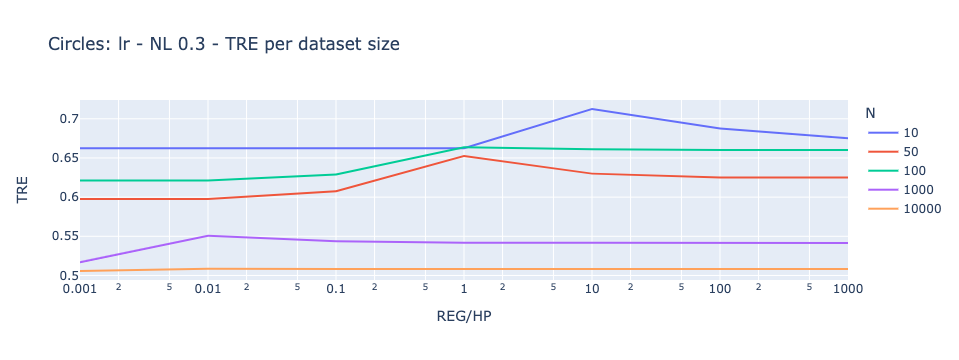

In [217]:
px.line(gp_results_df_03_c_lr, x='REG/HP', y='TRE', 
        color = 'N',
        log_x=True, 
        title="Circles: lr - NL 0.3 - TRE per dataset size ")

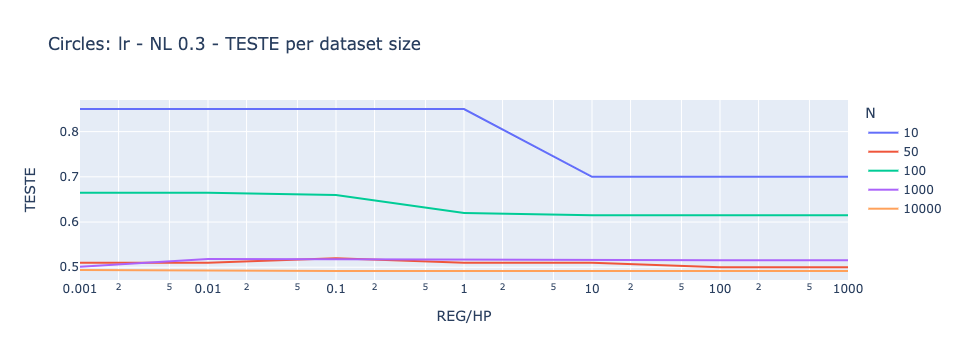

In [218]:
px.line(gp_results_df_03_c_lr, x='REG/HP', y='TESTE', 
        color = 'N',
        log_x=True, 
        title="Circles: lr - NL 0.3 - TESTE per dataset size ")

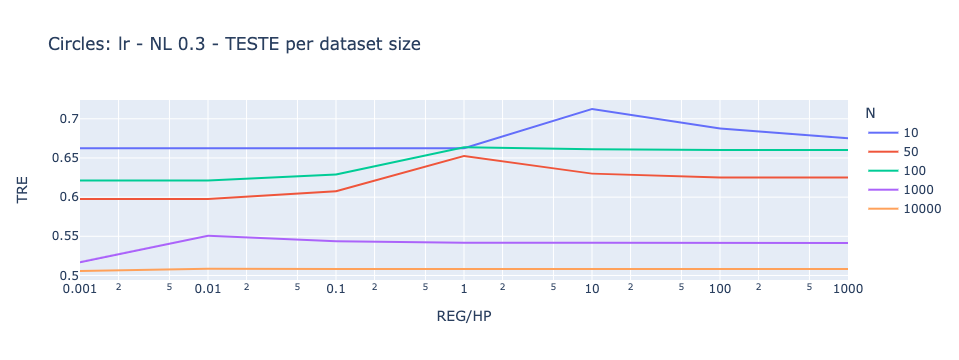

In [219]:
px.line(gp_results_df_03_c_lr, x='REG/HP', y='TRE', 
        color = 'N',
        log_x=True, 
        title="Circles: lr - NL 0.3 - TESTE per dataset size ")

In [221]:
results_df_03 = results_df[results_df['NL'] == 0.3]
results_df_03_m = results_df_03[results_df_03['DS_NAME'] == 'moons']
results_df_03_m_svm = results_df_03_m[results_df_03_m['CLF_NAME'] == 'svm']
gp_results_df_03_m_svm = results_df_03_m_svm.groupby(['N', 'REG/HP'])['TRE','TESTE','E_DIFF'].mean().reset_index()
gp_results_df_03_m_svm

/var/folders/c8/vzbxxgn95_5006y_v3wt76_m0000gn/T/ipykernel_8615/1965817594.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



N    REG/HP       TRE    TESTE        E_DIFF
0      10     0.001  0.725000  0.55000  1.750000e-01
1      10     0.005  0.725000  0.55000  1.750000e-01
2      10     0.010  0.725000  0.55000  1.750000e-01
3      10     0.100  1.000000  0.85000  1.500000e-01
4      10     0.500  1.000000  0.90000  1.000000e-01
5      10     1.000  1.000000  0.95000  5.000000e-02
6      10     5.000  1.000000  0.65000  3.500000e-01
7      10    10.000  1.000000  0.45000  5.500000e-01
8      10   100.000  1.000000  0.45000  5.500000e-01
9      10  1000.000  1.000000  0.45000  5.500000e-01
10     50     0.001  0.577500  0.49000  8.750000e-02
11     50     0.005  0.632500  0.52000  1.125000e-01
12     50     0.010  0.935000  0.92000  1.500000e-02
13     50     0.100  0.967500  0.97000 -2.500000e-03
14     50     0.500  0.972500  0.96000  1.250000e-02
15     50     1.000  0.980000  0.98000 -2.220446e-17
16     50     5.000  1.000000  0.98000  2.000000e-02
17     50    10.000  1.000000  0.96000  4.000000e-02
18     50   100.000  1.000000  0.59000  4.100000e-01
19     50  1000.000  1.000000  0.52000  4.800000e-01
20    100     0.001  0.536250  0.41500  1.212500e-01
21    100     0.005  0.877500  0.87000  7.500000e-03
22    100     0.010  0.896250  0.90500 -8.750000e-03
23    100     0.100  0.907500  0.91500 -7.500000e-03
24    100     0.500  0.932500  0.94000 -7.500000e-03
25    100     1.000  0.941250  0.94500 -3.750000e-03
26    100     5.000  0.982500  0.94500  3.750000e-02
27    100    10.000  0.992500  0.93000  6.250000e-02
28    100   100.000  1.000000  0.78500  2.150000e-01
29    100  1000.000  1.000000  0.52500  4.750000e-01
30   1000     0.001  0.833250  0.82050  1.275000e-02
31   1000     0.005  0.853500  0.83850  1.500000e-02
32   1000     0.010  0.863000  0.84850  1.450000e-02
33   1000     0.100  0.880625  0.86500  1.562500e-02
34   1000     0.500  0.923750  0.91200  1.175000e-02
35   1000     1.000  0.926750  0.91550  1.125000e-02
36   1000     5.000  0.926500  0.91150  1.500000e-02
37   1000    10.000  0.927375  0.91250  1.487500e-02
38   1000   100.000  0.952250  0.90100  5.125000e-02
39   1000  1000.000  0.993375  0.77050  2.228750e-01
40  10000     0.001  0.844812  0.84125  3.562500e-03
41  10000     0.005  0.854213  0.85200  2.212500e-03
42  10000     0.010  0.855900  0.85280  3.100000e-03
43  10000     0.100  0.886838  0.88325  3.587500e-03
44  10000     0.500  0.911950  0.90975  2.200000e-03
45  10000     1.000  0.912900  0.91035  2.550000e-03
46  10000     5.000  0.913625  0.90995  3.675000e-03
47  10000    10.000  0.913550  0.90980  3.750000e-03
48  10000   100.000  0.918600  0.90930  9.300000e-03
49  10000  1000.000  0.942587  0.89315  4.943750e-02

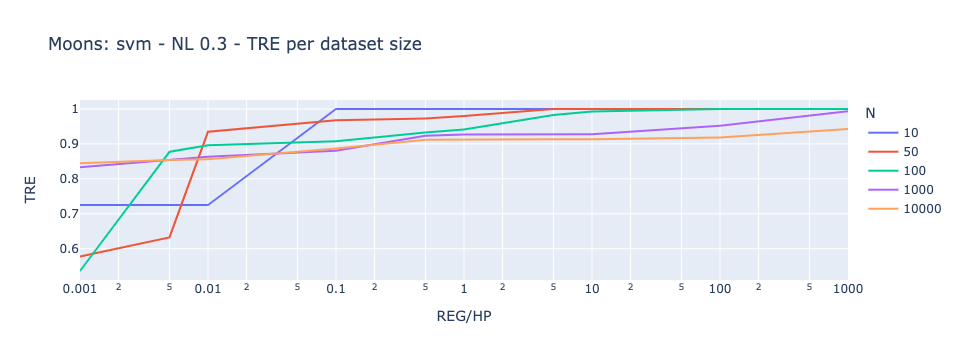

In [222]:
px.line(gp_results_df_03_m_svm, x='REG/HP', y='TRE', 
        color = 'N',
        log_x=True, 
        title="Moons: svm - NL 0.3 - TRE per dataset size ")

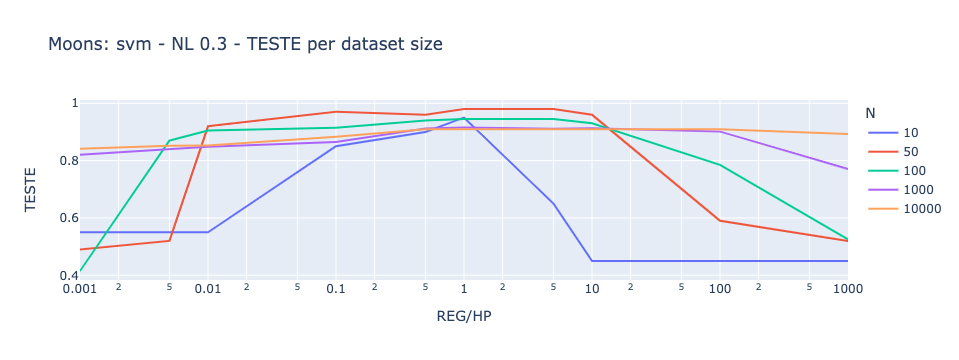

In [223]:
px.line(gp_results_df_03_m_svm, x='REG/HP', y='TESTE', 
        color = 'N',
        log_x=True, 
        title="Moons: svm - NL 0.3 - TESTE per dataset size ")

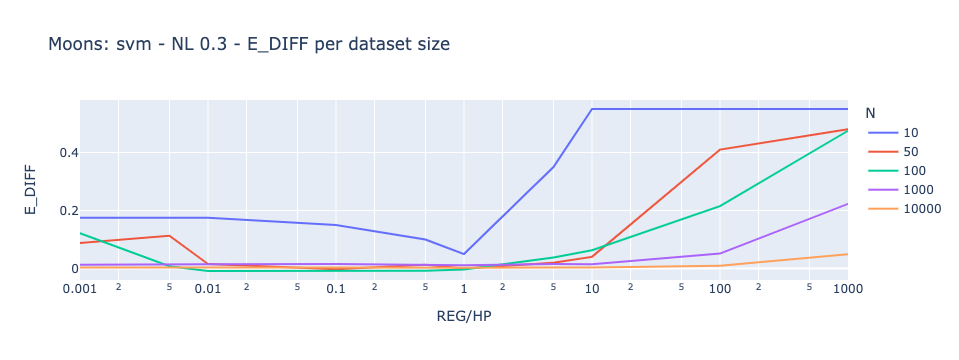

In [224]:
px.line(gp_results_df_03_m_svm, x='REG/HP', y='E_DIFF', 
        color = 'N',
        log_x=True, 
        title="Moons: svm - NL 0.3 - E_DIFF per dataset size ")

In [225]:
results_df_03 = results_df[results_df['NL'] == 0.3]
results_df_03_m = results_df_03[results_df_03['DS_NAME'] == 'moons']
results_df_03_m_lr = results_df_03_m[results_df_03_m['CLF_NAME'] == 'log_reg']
gp_results_df_03_m_lr = results_df_03_m_lr.groupby(['N', 'REG/HP'])['TRE','TESTE','E_DIFF'].mean().reset_index()
gp_results_df_03_m_lr

/var/folders/c8/vzbxxgn95_5006y_v3wt76_m0000gn/T/ipykernel_8615/340686717.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



N    REG/HP       TRE    TESTE    E_DIFF
0      10     0.001  0.700000  0.45000  0.250000
1      10     0.010  0.725000  0.55000  0.175000
2      10     0.100  0.762500  0.70000  0.062500
3      10     1.000  1.000000  0.90000  0.100000
4      10    10.000  1.000000  0.80000  0.200000
5      10   100.000  1.000000  0.75000  0.250000
6      10  1000.000  1.000000  0.75000  0.250000
7      50     0.001  0.577500  0.49000  0.087500
8      50     0.010  0.715000  0.61000  0.105000
9      50     0.100  0.975000  0.95000  0.025000
10     50     1.000  0.972500  0.97000  0.002500
11     50    10.000  0.972500  0.96000  0.012500
12     50   100.000  0.982500  0.96000  0.022500
13     50  1000.000  1.000000  0.96000  0.040000
14    100     0.001  0.537500  0.42000  0.117500
15    100     0.010  0.866250  0.83000  0.036250
16    100     0.100  0.902500  0.90500 -0.002500
17    100     1.000  0.911250  0.92500 -0.013750
18    100    10.000  0.927500  0.92500  0.002500
19    100   100.000  0.931250  0.92000  0.011250
20    100  1000.000  0.931250  0.92000  0.011250
21   1000     0.001  0.821500  0.81000  0.011500
22   1000     0.010  0.845125  0.83150  0.013625
23   1000     0.100  0.872000  0.85550  0.016500
24   1000     1.000  0.874625  0.86200  0.012625
25   1000    10.000  0.874125  0.86100  0.013125
26   1000   100.000  0.874000  0.86100  0.013000
27   1000  1000.000  0.874000  0.86100  0.013000
28  10000     0.001  0.822875  0.81965  0.003225
29  10000     0.010  0.850137  0.84675  0.003387
30  10000     0.100  0.855550  0.85155  0.004000
31  10000     1.000  0.855337  0.85185  0.003487
32  10000    10.000  0.855312  0.85190  0.003412
33  10000   100.000  0.855275  0.85190  0.003375
34  10000  1000.000  0.855275  0.85190  0.003375

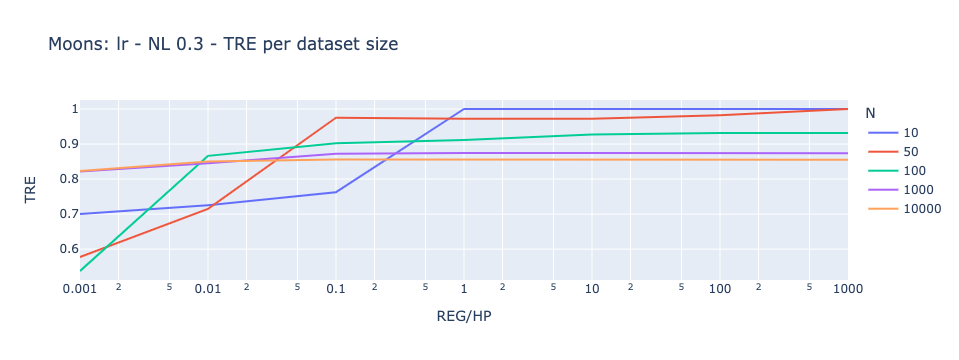

In [226]:
px.line(gp_results_df_03_m_lr, x='REG/HP', y='TRE', 
        color = 'N',
        log_x=True, 
        title="Moons: lr - NL 0.3 - TRE per dataset size ")

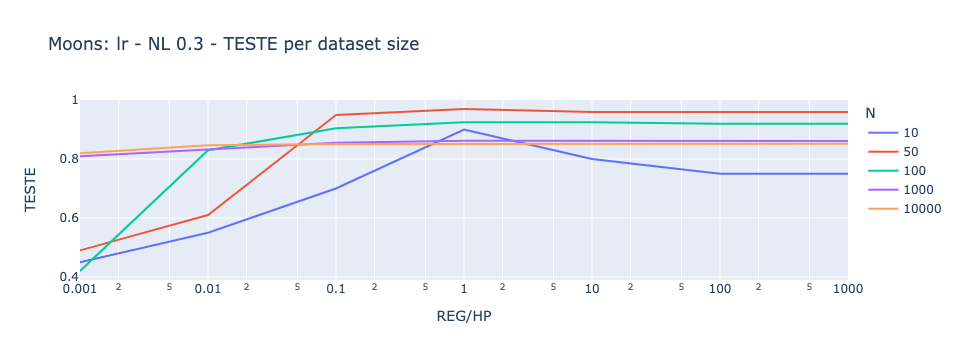

In [227]:
px.line(gp_results_df_03_m_lr, x='REG/HP', y='TESTE', 
        color = 'N',
        log_x=True, 
        title="Moons: lr - NL 0.3 - TESTE per dataset size ")

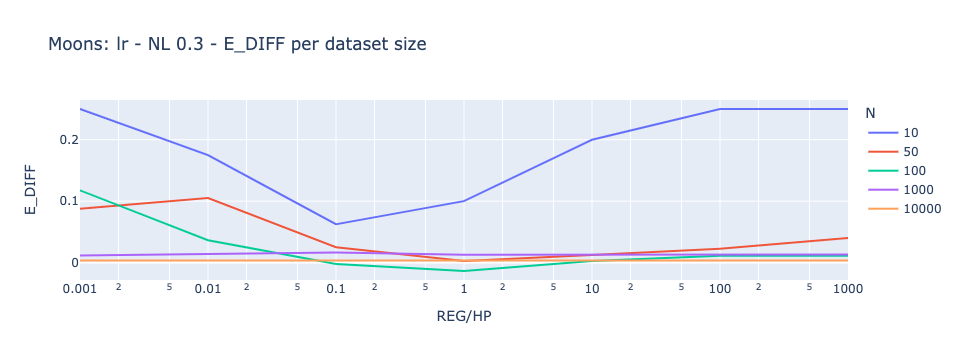

In [228]:
px.line(gp_results_df_03_m_lr, x='REG/HP', y='E_DIFF', 
        color = 'N',
        log_x=True, 
        title="Moons: lr - NL 0.3 - E_DIFF per dataset size ")


1. Are the noise level effect the number of datapoints needed to reach optimal test results? 

## Appendix

### More hints!

If you'll build the datasets dataframe correctly, you'll have **one** dataframe that has dataset_name and noise_level colmuns, as well as the regular x,y,label colmns. To unsure you've appended everything correctly, groupby the proper colmuns and look at the size:

In [51]:
# Use proper groupby statement to ensure the datasets dataframe contains data as expected. You should see the following result:

dataset_name  noise_level
circles       0.0            10000
              0.1            10000
              0.2            10000
              0.3            10000
              0.4            10000
              0.5            10000
moons         0.0            10000
              0.1            10000
              0.2            10000
              0.3            10000
              0.4            10000
              0.5            10000
dtype: int64

Your 

You experiment code should look something like that:

In [ ]:
datasets_type = ['circles', 'moons']
k_folds = 10
n_samples = [10, 50, 100, 1000, 10000]
noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
clf_types = ['log_reg', 'svm']
hp_range = <'Your hyper parameters ranges here'>
regularization_values = <'Your regularization values here'>
results = []
for ds_type in datasets_type:
    print(f'Working on {ds_type}')
    for nl in noise_levels:
        for n in n_samples:
            ds = datasets.query(<'your query here'>).head(n)
            print(f'Starting {k_folds}-fold cross validation for {ds_type} datasets with {n} samples and noise level {nl}. Going to train {clf_types} classifiers.')
            for k in range(k_folds):
                X, Y = <'Your code here'>
                x_train,x_test,y_train,y_test= <'Your code here'>
                for clf_type in clf_types:
                    if clf_type == 'log_reg':
                        for regularization_value in regularization_values:
                            train_acc, test_acc = <'Your code here'>
                            results.append(<'Your code here'>)
                    if clf_type == 'svm':
                        for gamma in hp_range:
                            train_acc, test_acc = <'Your code here'>
                            results.append(<'Your code here'>)

Working on circles
Starting 10-fold cross validation for circles datasets with 10 samples and noise level 0. Going to train ['log_reg', 'svm'] classifiers.
Starting 10-fold cross validation for circles datasets with 50 samples and noise level 0. Going to train ['log_reg', 'svm'] classifiers.
Starting 10-fold cross validation for circles datasets with 100 samples and noise level 0. Going to train ['log_reg', 'svm'] classifiers.
Starting 10-fold cross validation for circles datasets with 1000 samples and noise level 0. Going to train ['log_reg', 'svm'] classifiers.
Starting 10-fold cross validation for circles datasets with 10000 samples and noise level 0. Going to train ['log_reg', 'svm'] classifiers.


### Question 1 - Manual Classification

The purpose of this excercise is to examplify the need in a fitting algorithm. We will do so by trying to find only 2 models parameters by ourselves. 

In [2]:
slope, intercept = 2.5, 6

In [3]:
x_1, x_2 = 0.2, 0.6
on_line = [[x, x*slope + intercept,'on_line'] for x in np.linspace(-1,2,100)]

above_line = [[x_1, x_1*slope + intercept + 2, 'Above'], 
              [x_2, x_2*slope + intercept + 2, 'Above']] 

below_line = [[x_1, x_1*slope + intercept - 2, 'Below'], 
              [x_2, x_2*slope + intercept - 2, 'Below']] 

In [4]:
columns = ['x','y','label']
data = pd.DataFrame(on_line + above_line + below_line, columns = columns)

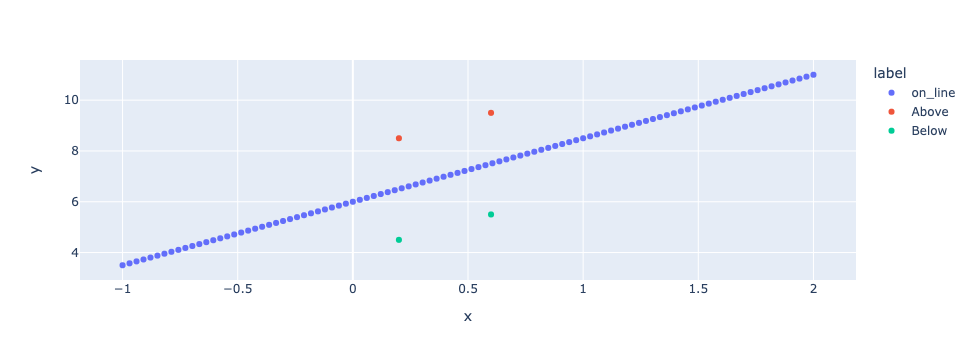

In [5]:
px.scatter(data, x='x', y='y', color = 'label')